In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
dataset = pd.read_csv('admitance.csv')

In [3]:
dataset

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
dataset.describe(include='all')

,SAT,Admitted
count,168.000000,168
unique,NaN,2
top,NaN,Yes
freq,NaN,94
mean,1695.273810,NaN
std,183.019017,NaN
min,1334.000000,NaN
25%,1547.500000,NaN
50%,1691.500000,NaN
75%,1844.500000,NaN


In [5]:
dataset['Admitted'] = dataset['Admitted'].map({'Yes':1,'No':0})

In [6]:
dataset

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [7]:
x1 = dataset['SAT']

In [8]:
y = dataset['Admitted']

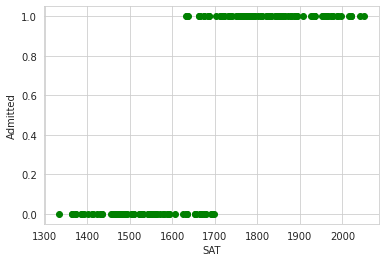

In [9]:
plt.scatter(x1,y,color='green')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [10]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
x = sm.add_constant(x1)

In [12]:
x

,const,SAT
0,1.0,1363
1,1.0,1792
2,1.0,1954
3,1.0,1653
4,1.0,1593
...,...,...
163,1.0,1722
164,1.0,1750
165,1.0,1555
166,1.0,1524


In [13]:
reg_lin = sm.OLS(y,x)

In [14]:
result_lin = reg_lin.fit()

In [15]:
ar = result_lin.summary()

In [16]:
ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           2.98e-43
Time:                        12:21:10   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
result_lin.params

const   -3.251859
SAT      0.002248
dtype: float64

In [18]:
result_lin.params[1]

0.002248239977968567

In [19]:
result_lin.params[0]

-3.2518585426506905

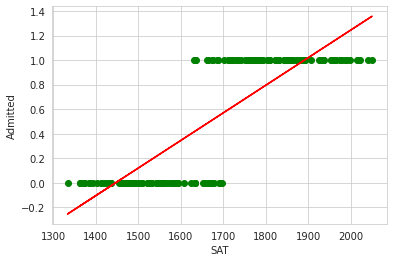

In [20]:
plt.scatter(x1,y,color='green')
y_hat = x1*result_lin.params[1]+result_lin.params[0]
plt.plot(x1,y_hat,color='red')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

# linear regression is not usefull
# so we will use Logistic

In [21]:
reg_log = sm.Logit(y,x)

In [22]:
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [23]:
result_log.params

const   -69.912802
SAT       0.042005
dtype: float64

In [24]:
def f(x,b0,b1):
    return np.array((np.exp(b0+b1*x))/(1+np.exp(b0+b1*x)))

In [25]:
f_sorted = np.sort(f(x1,result_log.params[0],result_log.params[1]))
f_sorted

array([9.39130917e-07, 3.17509804e-06, 3.31130788e-06, 4.26043595e-06,
       5.03991985e-06, 7.99999369e-06, 8.70110288e-06, 1.11951035e-05,
       1.63383507e-05, 2.48673397e-05, 2.70466415e-05, 3.78484857e-05,
       5.29641245e-05, 6.53414596e-05, 6.53414596e-05, 1.51356511e-04,
       1.86723145e-04, 1.94731925e-04, 2.20878399e-04, 2.20878399e-04,
       2.72485399e-04, 3.22323161e-04, 3.50561492e-04, 3.50561492e-04,
       3.81272805e-04, 3.97622735e-04, 4.50998879e-04, 5.56342322e-04,
       5.80195312e-04, 7.15694599e-04, 7.78368880e-04, 1.08890584e-03,
       1.40058570e-03, 1.40058570e-03, 1.52314535e-03, 2.41557378e-03,
       2.73909368e-03, 2.97843145e-03, 3.67195895e-03, 3.82888121e-03,
       5.81606838e-03, 6.06406209e-03, 7.78868807e-03, 8.12010613e-03,
       8.12010613e-03, 8.12010613e-03, 9.99886535e-03, 9.99886535e-03,
       1.08656392e-02, 1.28281107e-02, 1.51396041e-02, 2.02101782e-02,
       2.69325537e-02, 2.80555331e-02, 3.72881439e-02, 4.38114775e-02,
      

In [26]:
x_sorted = np.sort(np.array(x1))

In [27]:
x_sorted

array([1334, 1363, 1364, 1370, 1374, 1385, 1387, 1393, 1402, 1412, 1414,
       1422, 1430, 1435, 1435, 1455, 1460, 1461, 1464, 1464, 1469, 1473,
       1475, 1475, 1477, 1478, 1481, 1486, 1487, 1492, 1494, 1502, 1508,
       1508, 1510, 1521, 1524, 1526, 1531, 1532, 1542, 1543, 1549, 1550,
       1550, 1550, 1555, 1555, 1557, 1561, 1565, 1572, 1579, 1580, 1587,
       1591, 1593, 1593, 1607, 1625, 1631, 1633, 1634, 1634, 1634, 1634,
       1636, 1653, 1654, 1656, 1662, 1663, 1664, 1664, 1666, 1670, 1674,
       1674, 1675, 1679, 1685, 1687, 1687, 1690, 1693, 1697, 1702, 1712,
       1714, 1715, 1720, 1720, 1721, 1722, 1730, 1735, 1735, 1741, 1750,
       1755, 1760, 1761, 1764, 1764, 1769, 1773, 1775, 1775, 1777, 1778,
       1781, 1786, 1787, 1792, 1794, 1802, 1808, 1808, 1810, 1821, 1824,
       1826, 1831, 1832, 1842, 1843, 1849, 1850, 1850, 1850, 1855, 1855,
       1857, 1861, 1865, 1872, 1879, 1880, 1887, 1891, 1893, 1893, 1907,
       1925, 1931, 1933, 1934, 1934, 1934, 1936, 19

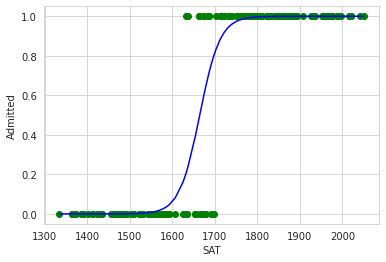

In [30]:
plt.scatter(x1,y,color='green')
plt.plot(x_sorted,f_sorted,color='blue')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

# 17 nov

In [ ]:
datasets = pd.read_csv('')